In [1]:
import talib
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
stock_data= pd.read_csv('EUR_STOCK_DATA.csv')
stock_data                        

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


In [3]:
# BETWEEN OPEN AND CLOSE
# If Datetime is in string only the 1st that is day was being comapred
stock_data['Gmt time']=pd.to_datetime(stock_data['Gmt time'])

def return_data_for_period():
  date1=input("Enter first Date for time period format D.M.Y :- ")
  date2=input("Enter Second Date for time period format D.M.Y :- ")
  date1=date1.split(".")
  date2=date2.split(".")
  date1=datetime.datetime(year=int(date1[2]),month=int(date1[1]),day=int(date1[0]))
  date2=datetime.datetime(year=int(date2[2]),month=int(date2[1]),day=int(date2[0]))
  date_filt1=stock_data[stock_data["Gmt time"]>date1]
  return date_filt1[date_filt1["Gmt time"]<date2]

Enter first Date for time period format D.M.Y :- 11.12.2019
Enter Second Date for time period format D.M.Y :- 12.12.2019


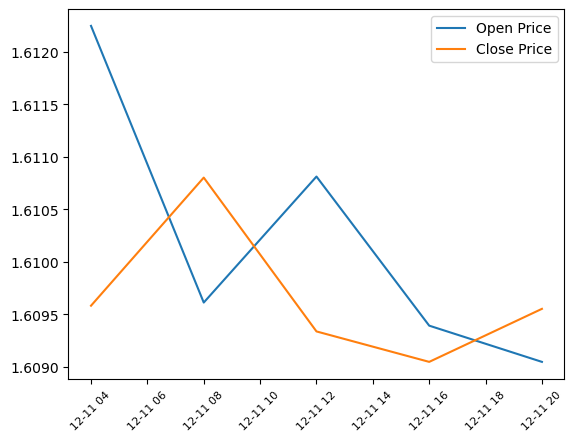

In [4]:
open_Close_filtered_Data=return_data_for_period()
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Open'],label="Open Price")
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Close'],label="Close Price")
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.show()

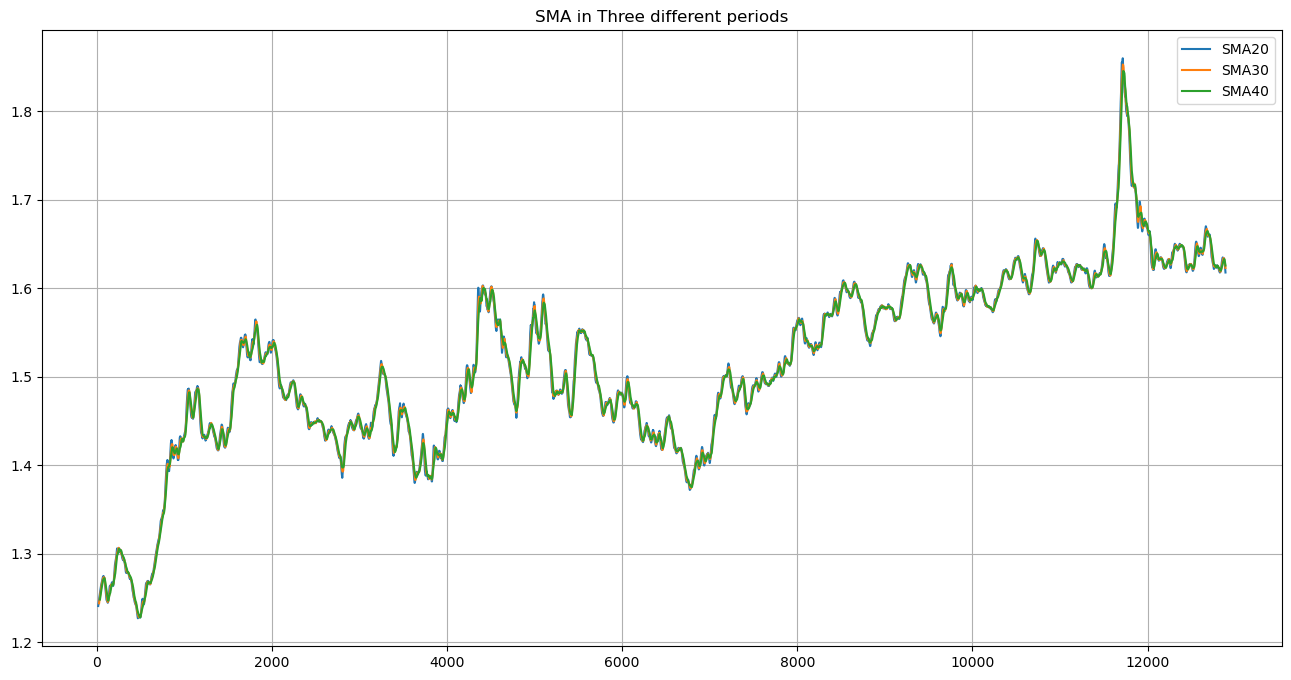

In [5]:
#SIMPLE MOVING AVARAGE

stock_data['SMA20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['SMA30'] = talib.SMA(stock_data['Close'], timeperiod=30)
stock_data['SMA40'] = talib.SMA(stock_data['Close'], timeperiod=40)
plt.figure(figsize=(16, 8))
plt.plot(stock_data['SMA20'], label='SMA20')
plt.plot(stock_data['SMA30'], label='SMA30')
plt.plot(stock_data['SMA40'], label='SMA40')
# plt.plot(stock_data['Close'], label='Close')
plt.legend()
plt.grid(True)
plt.title('SMA in Three different periods')
plt.show()

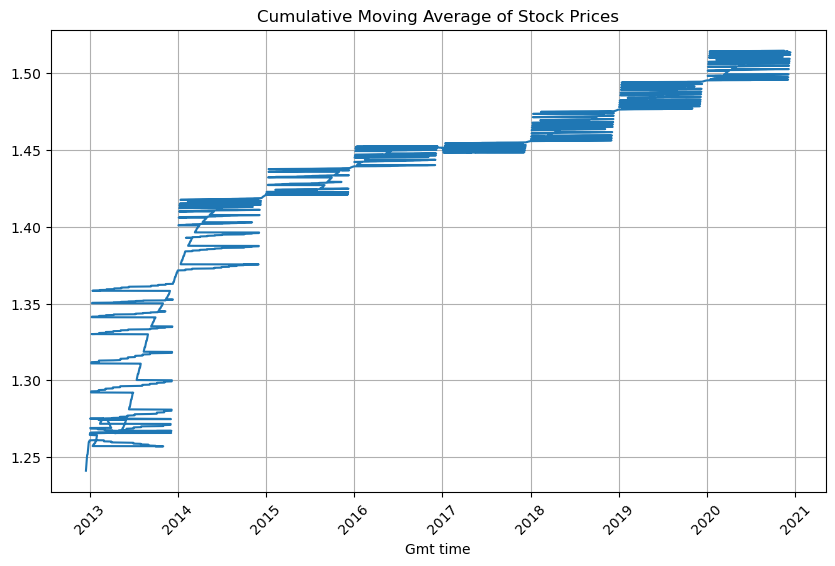

In [6]:
#CUMULATIVE MOVING AVARAGE
stock_data['CMA20'] = stock_data['Close'].expanding(min_periods=20).mean()
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Gmt time'], stock_data['CMA20'])
plt.xlabel('Gmt time')
plt.title('Cumulative Moving Average of Stock Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

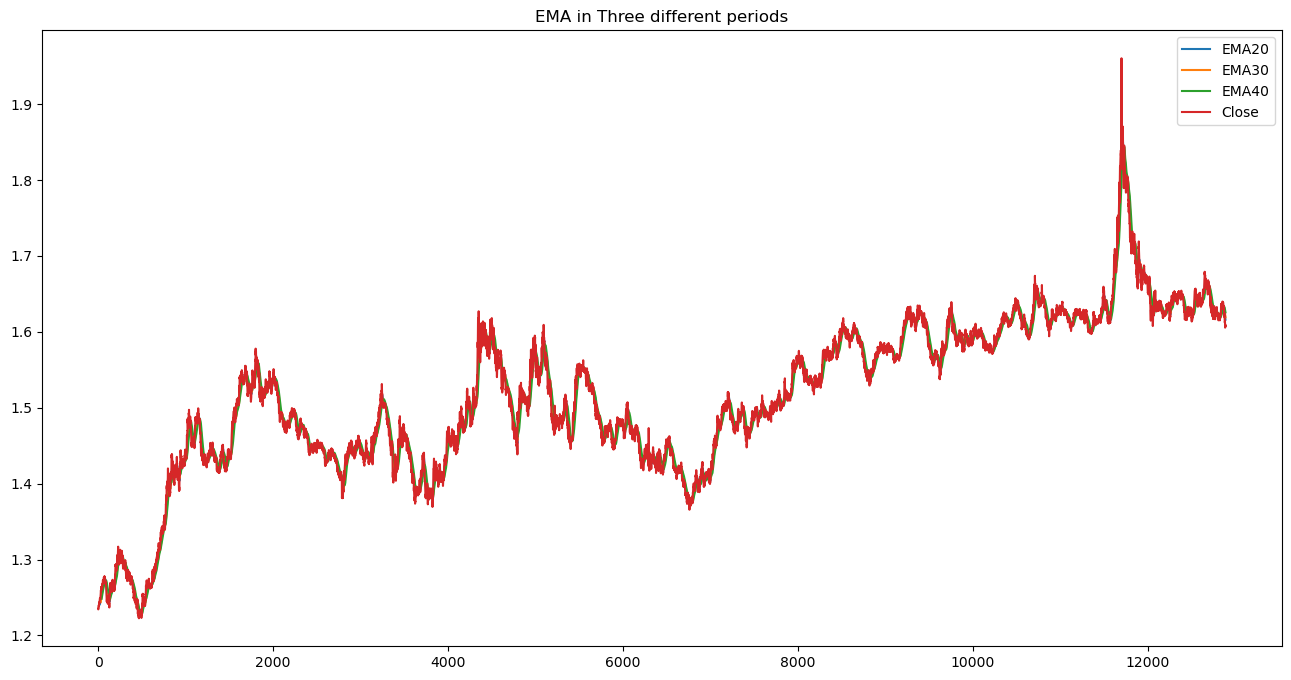

In [7]:
#EXPONENTIAL MOVING AVERAGE

stock_data['EMA20'] = talib.EMA(stock_data['Close'], timeperiod=20)
stock_data['EMA30'] = talib.EMA(stock_data['Close'], timeperiod=30)
stock_data['EMA40'] = talib.EMA(stock_data['Close'], timeperiod=40)
plt.figure(figsize=(16, 8))
plt.plot(stock_data['EMA20'], label='EMA20')
plt.plot(stock_data['EMA30'], label='EMA30')
plt.plot(stock_data['SMA40'], label='EMA40')
plt.plot(stock_data['Close'], label='Close')
plt.legend()
plt.title('EMA in Three different periods')
plt.show()

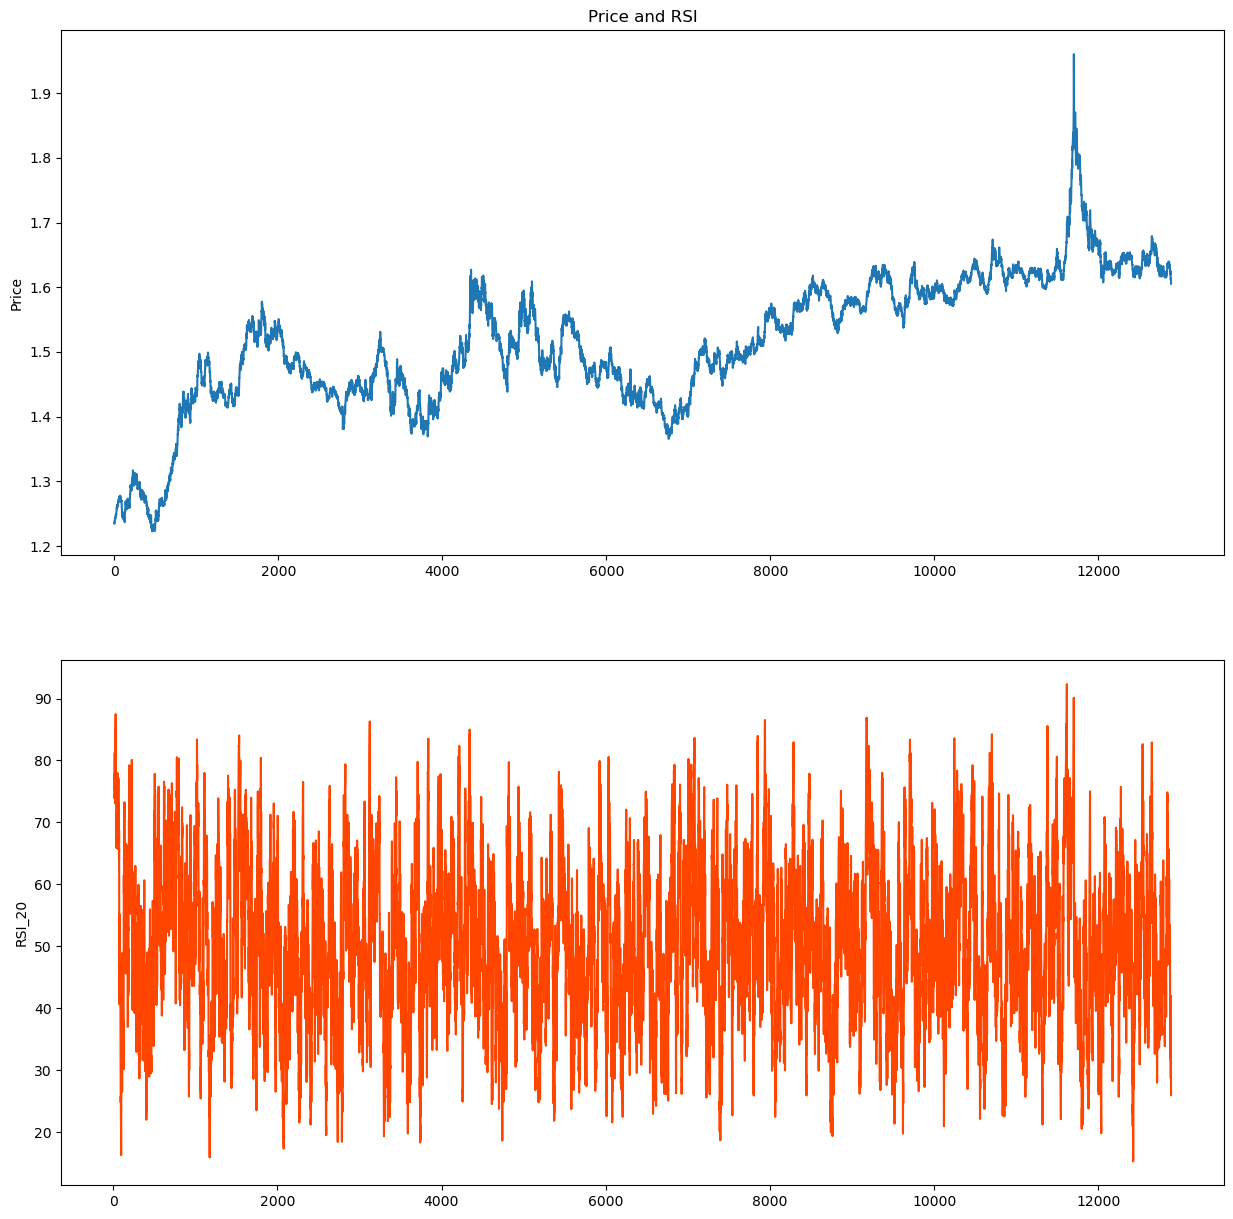

In [24]:
# RSI

stock_data['RSI_20'] = talib.RSI(stock_data['Close'],timeperiod = 14)

# Calculate RSI with a time period of 30
stock_data['RSI_30'] = talib.RSI(stock_data['Close'], timeperiod = 30)
stock_data['RSI_40'] = talib.RSI(stock_data['Close'], timeperiod = 40)

# Print the last five rows
#print(stock_data.tail())

fig, (ax1, ax2) = plt.subplots(2, figsize=(15,15))
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('RSI_20')
ax2.plot(stock_data['RSI_20'], color='orangered')

ax1.set_title('Price and RSI')
plt.show()

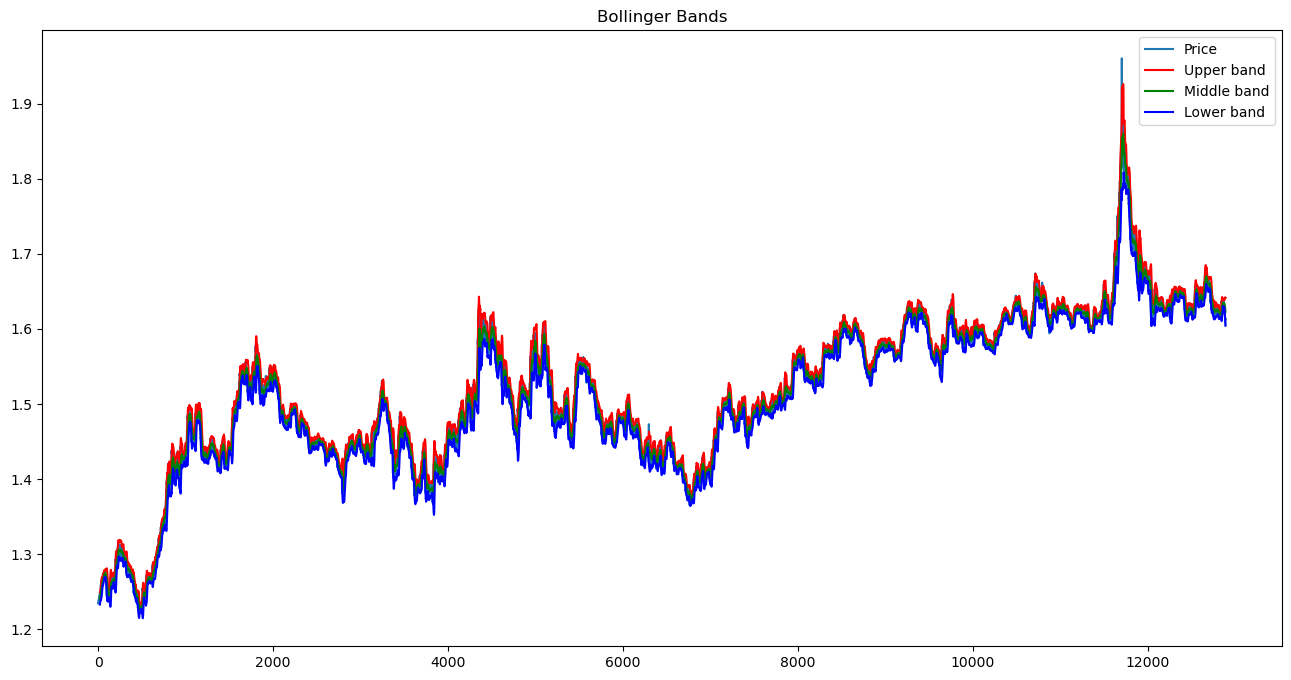

In [25]:
#Bollinger Bands 

upper, mid, lower = talib.BBANDS(stock_data['Close'],
                                 nbdevup=2,
                                 nbdevdn=2,
                                 timeperiod=20)

plt.figure(figsize=(16, 8))

# Plot the Bollinger Bands 
plt.plot(stock_data['Close'], label='Price')
plt.plot(upper, color='Red' , label='Upper band')
plt.plot(mid, color='Green', label='Middle band')
plt.plot(lower, color='blue', label='Lower band')

# Customize and show the plot
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [10]:
# stock_data['price_change']= stock_data['Close'].diff()
# stock_data['label']=0

# for i in range(len(stock_data)-1):
#     if stock_data.loc[i+1,'price_change']>0:
#         stock_data.loc[i,'label']=1
# stock_data.loc[len(stock_data)]=0
# stock_data

In [11]:
# stock_data = stock_data.drop('Close', axis=1)
# stock_data = stock_data.drop('price_change', axis=1)
# stock_data

In [12]:
# stock_data

In [13]:
# X=stock_data.iloc[:,:-1].values
# y=stock_data.iloc[:,-1].values
# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=52)


In [14]:
# from sklearn.ensemble import RandomForestClassifier
# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, y_train)
# Y_prediction = random_forest.predict(X_test)
# accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
# acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


# cm = confusion_matrix(y_test, Y_prediction)
# accuracy = accuracy_score(y_test,Y_prediction)
# precision =precision_score(y_test, Y_prediction,average='micro')
# recall =  recall_score(y_test, Y_prediction,average='micro')
# f1 = f1_score(y_test,Y_prediction,average='micro')
# print('Confusion matrix for Random Forest\n',cm)
# print('accuracy_random_Forest : %.3f' %accuracy)
# print('precision_random_Forest : %.3f' %precision)
# print('recall_random_Forest : %.3f' %recall)
# print('f1-score_random_Forest : %.3f' %f1)

In [15]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(X_train, y_train)
# Y_pred = knn.predict(X_test)
# accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
# acc_knn = round(knn.score(X_train, y_train) * 100, 2)

# cm = confusion_matrix(y_test, Y_pred)
# accuracy = accuracy_score(y_test,Y_pred)
# precision =precision_score(y_test, Y_pred,average='micro')
# recall =  recall_score(y_test, Y_pred,average='micro')
# f1 = f1_score(y_test,Y_pred,average='micro')
# print('Confusion matrix for KNN\n',cm)
# print('accuracy_KNN : %.3f' %accuracy)
# print('precision_KNN : %.3f' %precision)
# print('recall_KNN: %.3f' %recall)

In [16]:
#Part 2


In [31]:
stock_data['SMA20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['SMA30'] = talib.SMA(stock_data['Close'], timeperiod=30)
stock_data['SMA40'] = talib.SMA(stock_data['Close'], timeperiod=40)

stock_data['EMA20'] = talib.EMA(stock_data['Close'], timeperiod=20)
stock_data['EMA30'] = talib.EMA(stock_data['Close'], timeperiod=30)
stock_data['EMA40'] = talib.EMA(stock_data['Close'], timeperiod=40)

stock_data['CMA20'] = stock_data['Close'].expanding(min_periods=20).mean()

stock_data['RSI20'] = talib.RSI(stock_data['Close'], timeperiod=20)
stock_data['RSI30'] = talib.RSI(stock_data['Close'], timeperiod=30)
stock_data['RSI40'] = talib.RSI(stock_data['Close'], timeperiod=40)

stock_data = stock_data.loc[:, ~stock_data.columns.duplicated()]

upper, middle, lower = talib.BBANDS(stock_data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)
stock_data['BBUpper'] = upper
stock_data['BBMiddle'] = middle
stock_data['BBLower'] = lower

stock_data['Label'] = stock_data['Close'].shift(-1)
stock_data['Label'] = stock_data['Label'].diff()
stock_data['Label'] = stock_data['Label'].apply(lambda x: 1 if x > 0 else 0)
stock_data = stock_data[:-1]

column_order = ['Gmt time', 'Volume', 'Open', 'High', 'Low', 'Close', 'Label', 'EMA20', 'EMA30', 'EMA40',
                'SMA20', 'SMA30', 'SMA40', 'CMA20', 'RSI20', 'RSI30', 'RSI40', 'BBUpper', 'BBMiddle', 'BBLower']
stock_data = stock_data[column_order]

print(stock_data.head())


             Gmt time      Volume     Open      High       Low     Close  \
0 2012-12-12 00:00:00  11011.3902  1.23492  1.235890  1.233830  1.235200   
1 2012-12-12 04:00:00  13271.5599  1.23521  1.235510  1.233860  1.234340   
2 2012-12-12 08:00:00  26716.2305  1.23435  1.236370  1.233305  1.234905   
3 2012-12-12 12:00:00  28430.1602  1.23491  1.237285  1.234850  1.236810   
4 2012-12-12 16:00:00  33124.1904  1.23680  1.238700  1.236285  1.238205   

   Label  EMA20  EMA30  EMA40  SMA20  SMA30  SMA40  CMA20  RSI20  RSI30  \
0      0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1      1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2      1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3      1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4      1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   RSI40  BBUpper  BBMiddle  BBLower  
0    NaN      NaN       NaN      NaN  
1    NaN      

In [32]:
stock_data = stock_data.drop(['Gmt time', 'Close'], axis=1)

stock_data

,Volume,Open,High,Low,Label,EMA20,EMA30,EMA40,SMA20,SMA30,SMA40,CMA20,RSI20,RSI30,RSI40,BBUpper,BBMiddle,BBLower
0,11011.3902,1.234920,1.235890,1.233830,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13271.5599,1.235210,1.235510,1.233860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26716.2305,1.234350,1.236370,1.233305,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28430.1602,1.234910,1.237285,1.234850,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33124.1904,1.236800,1.238700,1.236285,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12876,32556.9400,1.619580,1.624870,1.619375,1,1.629646,1.630110,1.629920,1.630943,1.632067,1.632741,1.514634,42.618820,45.457101,46.746136,1.640198,1.630943,1.621687
12877,9977.6000,1.623395,1.626945,1.622350,0,1.629186,1.629768,1.629671,1.630607,1.631688,1.632656,1.514642,44.395169,46.629129,47.620864,1.640233,1.630607,1.620980
12878,20473.5700,1.624835,1.624950,1.617530,0,1.628203,1.629065,1.629144,1.629924,1.631284,1.632233,1.514650,39.065587,42.659060,44.483401,1.640771,1.629924,1.619077
12879,19054.3700,1.618880,1.621910,1.617415,0,1.627266,1.628374,1.628618,1.629284,1.630758,1.631793,1.514658,38.654764,42.345379,44.232020,1.641218,1.629284,1.617349


In [33]:
print("Updated stock data:")
print(stock_data.head())

Updated stock data with indicators and labels:
       Volume     Open      High       Low  Label  EMA20  EMA30  EMA40  SMA20  \
0  11011.3902  1.23492  1.235890  1.233830      0    NaN    NaN    NaN    NaN   
1  13271.5599  1.23521  1.235510  1.233860      1    NaN    NaN    NaN    NaN   
2  26716.2305  1.23435  1.236370  1.233305      1    NaN    NaN    NaN    NaN   
3  28430.1602  1.23491  1.237285  1.234850      1    NaN    NaN    NaN    NaN   
4  33124.1904  1.23680  1.238700  1.236285      1    NaN    NaN    NaN    NaN   

   SMA30  SMA40  CMA20  RSI20  RSI30  RSI40  BBUpper  BBMiddle  BBLower  
0    NaN    NaN    NaN    NaN    NaN    NaN      NaN       NaN      NaN  
1    NaN    NaN    NaN    NaN    NaN    NaN      NaN       NaN      NaN  
2    NaN    NaN    NaN    NaN    NaN    NaN      NaN       NaN      NaN  
3    NaN    NaN    NaN    NaN    NaN    NaN      NaN       NaN      NaN  
4    NaN    NaN    NaN    NaN    NaN    NaN      NaN       NaN      NaN  


In [ ]:
########

In [35]:
stock_data = stock_data.fillna(0)

stock_data.head()
# import numpy as np

# stock_data=stock_data.replace(0,np.nan)

,Volume,Open,High,Low,Label,EMA20,EMA30,EMA40,SMA20,SMA30,SMA40,CMA20,RSI20,RSI30,RSI40,BBUpper,BBMiddle,BBLower
0,11011.3902,1.23492,1.235890,1.233830,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13271.5599,1.23521,1.235510,1.233860,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26716.2305,1.23435,1.236370,1.233305,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28430.1602,1.23491,1.237285,1.234850,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33124.1904,1.23680,1.238700,1.236285,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X = stock_data.iloc[:, 2:]  
y = stock_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

print("# Random Forest :")
print(classification_report(y_test, rf_predictions))
print("# K-Nearest Neighbors :")
print(classification_report(y_test, knn_predictions))
print("# Naive Bayes :")
print(classification_report(y_test, nb_predictions))
print("# SVM :")
print(classification_report(y_test, svm_predictions))
print("# Decision Tree :")
print(classification_report(y_test, dt_predictions))


# Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1309
           1       1.00      1.00      1.00      1268

    accuracy                           1.00      2577
   macro avg       1.00      1.00      1.00      2577
weighted avg       1.00      1.00      1.00      2577

# K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1309
           1       0.99      0.99      0.99      1268

    accuracy                           0.99      2577
   macro avg       0.99      0.99      0.99      2577
weighted avg       0.99      0.99      0.99      2577

# Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1309
           1       1.00      1.00      1.00      1268

    accuracy                           1.00      2577
   macro avg       1.00      1.00      1